In [132]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

In [107]:
data = pd.read_csv("C:/Users\plaoz\Desktop\ProjectsAlp\drug200_c.csv")

In [108]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [109]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [111]:
print(data.isna().sum())
print(data.duplicated().sum())

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64
0


<Axes: xlabel='Sex', ylabel='Age'>

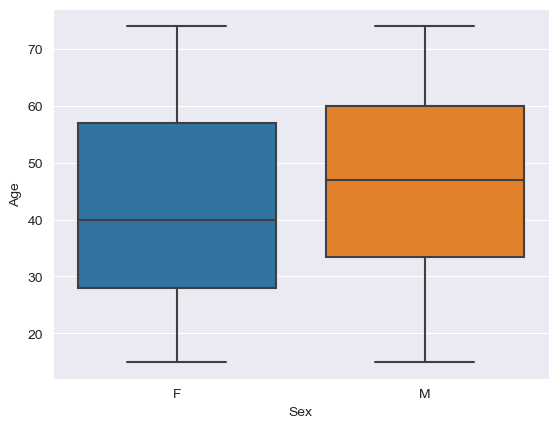

In [112]:
sns.boxplot(data, x = "Sex", y = "Age")

In [117]:
encoder = LabelEncoder()
data["Sex"] = encoder.fit_transform(data["Sex"])
data["Cholesterol"] = encoder.fit_transform(data["Cholesterol"])
data["BP"] = encoder.fit_transform(data["BP"])
data["Drug"] = encoder.fit_transform(data["Drug"])


In [122]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


<Axes: >

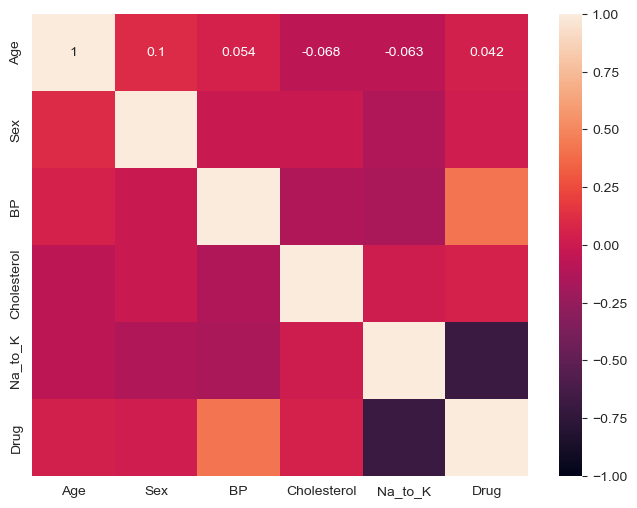

In [130]:
cor = data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(cor, vmin = -1, vmax = 1, annot = True)

We seperate our data into target and features

In [131]:
X = data.drop("Drug", axis = 1)
y = data["Drug"]

Let's select our models and train them

In [133]:
num_classes = 5
class_counts = np.zeros(num_classes, dtype= int)

In [136]:
for i in range(num_classes):
    class_counts[i] = (data["Drug"] == i).sum()
    
for i, count in enumerate(class_counts):
    print("Number of class", i, ":", count)

Number of class 0 : 91
Number of class 1 : 23
Number of class 2 : 16
Number of class 3 : 16
Number of class 4 : 54


As you can see classes are not distributed normally.

In [ ]:
pipeline_KNN = Pipeline(
    ("Scaler" , StandardScaler()),
    ("KNN", KNeighborsClassifier(n_neighbors= 5))
)